<a href="https://colab.research.google.com/github/KOMMURUTEJASWI/internship/blob/main/Hand_Written_Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hand Written Digit Prediction

Objective

The objective of this task is to explore and visualize the digits dataset, which contains 8x8 pixel grayscale images of handwritten digits ranging from 0 to 9. By examining the structure and attributes of the dataset, we aim to gain an initial understanding of its content. Specifically, we will visualize the first four images along with their corresponding labels to better comprehend the data. This exploration will lay the groundwork for subsequent tasks, such as building a machine learning model to accurately classify these handwritten digits based on their pixel representations.

IMPORT lib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import data

In [ ]:
from sklearn.datasets import load_digits


In [ ]:
df= load_digits()

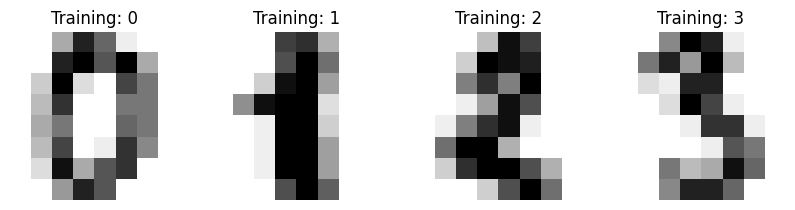

In [ ]:
_,axes= plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax,image,label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap= plt.cm.gray_r, interpolation="nearest")
  ax.set_title(f"Training: {label}")
plt.show()

Data Preprocessing

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[10]

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [ ]:
data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [ ]:
data[1].shape

(64,)

In [ ]:
data.shape

(1797, 64)

In [ ]:
data.min()



0.0

In [ ]:
data.max()


16.0

In [ ]:
data=data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[2]

array([0.    , 0.    , 0.    , 0.25  , 0.9375, 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.1875, 1.    , 0.9375, 0.875 , 0.    , 0.    ,
       0.    , 0.    , 0.5   , 0.8125, 0.5   , 1.    , 0.    , 0.    ,
       0.    , 0.    , 0.0625, 0.375 , 0.9375, 0.6875, 0.    , 0.    ,
       0.    , 0.0625, 0.5   , 0.8125, 0.9375, 0.0625, 0.    , 0.    ,
       0.    , 0.5625, 1.    , 1.    , 0.3125, 0.    , 0.    , 0.    ,
       0.    , 0.1875, 0.8125, 1.    , 1.    , 0.6875, 0.3125, 0.    ,
       0.    , 0.    , 0.    , 0.1875, 0.6875, 1.    , 0.5625, 0.    ])

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,df.target, test_size=0.3)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict= rf.predict(X_test)

In [ ]:
y_predict

array([2, 2, 0, 1, 5, 4, 1, 6, 3, 8, 5, 8, 7, 1, 9, 8, 6, 9, 8, 4, 9, 7,
       8, 0, 5, 6, 0, 0, 9, 0, 2, 0, 3, 3, 7, 5, 1, 1, 7, 3, 4, 6, 7, 0,
       2, 6, 1, 3, 5, 3, 6, 5, 9, 3, 6, 3, 9, 3, 2, 3, 0, 2, 2, 4, 6, 7,
       0, 5, 0, 5, 7, 3, 8, 8, 4, 1, 2, 4, 1, 3, 1, 8, 4, 1, 4, 0, 2, 6,
       3, 0, 1, 7, 3, 9, 6, 6, 0, 1, 9, 4, 2, 4, 4, 2, 0, 7, 7, 6, 5, 8,
       0, 5, 5, 1, 6, 6, 2, 5, 3, 5, 6, 3, 0, 9, 8, 1, 1, 2, 6, 5, 4, 6,
       1, 5, 8, 3, 8, 8, 0, 9, 8, 4, 4, 2, 1, 9, 2, 5, 7, 5, 9, 4, 3, 5,
       7, 6, 3, 7, 8, 5, 1, 3, 7, 9, 8, 3, 0, 8, 7, 5, 7, 6, 9, 2, 7, 3,
       8, 9, 6, 1, 1, 8, 3, 6, 2, 0, 0, 6, 7, 7, 7, 6, 9, 6, 5, 6, 7, 5,
       8, 6, 9, 3, 2, 1, 7, 0, 4, 0, 1, 4, 3, 1, 6, 9, 1, 1, 7, 3, 6, 9,
       8, 5, 3, 1, 9, 8, 8, 1, 9, 2, 0, 2, 3, 5, 5, 2, 5, 4, 7, 8, 2, 9,
       5, 9, 9, 1, 9, 7, 6, 9, 7, 4, 6, 9, 9, 1, 3, 4, 9, 8, 8, 8, 9, 4,
       7, 4, 9, 7, 7, 4, 1, 9, 0, 1, 8, 3, 7, 4, 1, 2, 5, 5, 5, 2, 7, 3,
       9, 3, 6, 1, 3, 7, 4, 4, 4, 1, 8, 0, 2, 4, 6,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test,y_predict)

array([[47,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 61,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 57,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  3,  0,  0,  0,  2,  0,  1, 48,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 54]])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.95      1.00      0.98        61
           2       1.00      1.00      1.00        47
           3       0.98      0.95      0.97        61
           4       0.98      1.00      0.99        48
           5       0.97      0.98      0.97        58
           6       0.98      0.98      0.98        52
           7       0.96      0.98      0.97        55
           8       0.94      0.87      0.91        55
           9       0.96      0.98      0.97        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



Explaination

This project demonstrates a complete machine learning workflow, from data loading to model evaluation, using the digits dataset. The digits dataset consists of 8x8 pixel images of handwritten digits (0-9), which are used to train a machine learning model to recognize and classify these digits.

1. Importing Libraries
Essential Python libraries like pandas, numpy, matplotlib, and scikit-learn are imported. These libraries provide the tools needed for data manipulation, visualization, and model building.
2. Loading the Dataset
The digits dataset is loaded using load_digits() from scikit-learn. This dataset contains images of digits along with their corresponding labels, which indicate the digit each image represents.
3. Data Visualization
A small sample of the dataset (four images) is visualized to provide an initial understanding of what the data looks like. This helps in grasping the nature of the problem—digit recognition.
4. Data Exploration
The dataset's dimensions and the structure of the image data are explored. The images, originally in a 3D array format, are reshaped into a 2D format to prepare them for model training. This reshaping is necessary because most machine learning algorithms expect the input data to be in a flat, 2D array format.
5. Data Preprocessing
The image data is normalized by scaling the pixel values between 0 and 1. Normalization ensures that the model trains efficiently and converges faster by reducing the range of the data.
6. Splitting the Data
The dataset is split into training and testing sets using train_test_split(). This split is crucial for evaluating the model's performance on unseen data, which simulates how the model would perform in real-world scenarios.
7. Modeling
A Random Forest classifier, a powerful ensemble learning method, is chosen for the task. The model is trained on the training data, where it learns to distinguish between different digits based on their pixel patterns.
8. Model Evaluation
The trained model is used to predict the labels of the test data. The predictions are compared with the actual labels to assess the model's accuracy. A confusion matrix is generated, showing where the model's predictions were correct and where it made mistakes. Additionally, a classification report is printed, providing metrics like precision, recall, and F1-score for each digit class.